In [1]:
from math import cos, log, pi, sqrt

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import MatOP

In [2]:
# Random number generator
def BoxMuller(mean, var):
    # y = x*sigma + var
    # => y = sqrt(-2*ln(a)) * cos(2*pi*b) * sigma + mu
    a = np.random.uniform()
    b = np.random.uniform()
    sigma = np.sqrt(var)

    y = sqrt(-2 * log(a)) * cos(2 * pi * b) * sigma + mean
    return y


def printGaussianDist(mean, var):
    Gaussian = []
    for i in range(10000):
        Gaussian.append(BoxMuller(mean, var))
    plt.hist(Gaussian, 100)
    #plt.savefig("Gaussian")
    plt.show()
    plt.clf()

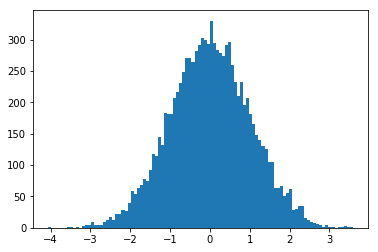

<Figure size 432x288 with 0 Axes>

In [3]:
printGaussianDist(0, 1)

In [4]:
def polyBasis(n, a, w):
    e = BoxMuller(0, a)
    x = np.random.uniform(-10, 10)
    y = 0
    for i in range(n):
        y += x**i * w[i]
    y += e
    return [x, y]


def printPolyBasis(n, a, w):
    x = []
    y = []
    for _ in range(10000):
        res = polyBasis(n, a, w)
        x.append(res[0])
        y.append(res[1])
    plt.scatter(x, y)
    #plt.savefig("Poly")
    plt.show()
    plt.clf()

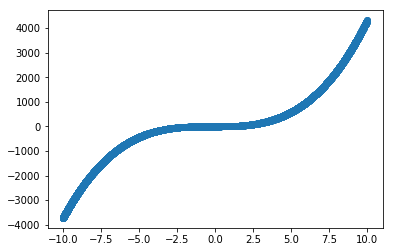

<Figure size 432x288 with 0 Axes>

In [5]:
printPolyBasis(4, 10, [1, 2, 3, 4])

In [9]:
from math import inf


# Sequential Estimator
def WelfordEstimate(mean, var):  # Using online algorithm
    print("Data point source function: N(%.2f, %.2f)\n" % (mean, var))
    Xbar = inf
    prev_Xbar = -inf
    sigma = inf
    prev_Sigma = -inf
    iters = 1
    while abs(Xbar - prev_Xbar) >= 10**-4 or abs(sigma - prev_Sigma) >= 10**-4:
        # set a maximum iteration
        if iters > 10000:
            break

        newData = BoxMuller(mean, var)
        # initial condition
        if iters == 1:
            Xbar = newData
            sigma = 0
        else:
            prev_Xbar = Xbar
            prev_Sigma = sigma
            Xbar = prev_Xbar + (newData - prev_Xbar) / iters
            sigma = prev_Sigma + (
                (newData - prev_Xbar) * (newData - Xbar) - prev_Sigma) / iters
        print("[%d] Add data point: %f" % (iters, newData))
        print("Mean = %f, Variance = %f" % (Xbar, sigma))
        iters += 1

$$\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}$$
$$\sigma^2_n = \sigma^2_{n-1} + \frac{(x_n - \bar{x}_{n-1})(x_n - \bar{x}_n) - \sigma^2_{n-1}}{n}$$

In [10]:
WelfordEstimate(3, 5)

Data point source function: N(3.00, 5.00)

[1] Add data point: 0.997029
Mean = 0.997029, Variance = 0.000000
[2] Add data point: 3.367716
Mean = 2.182372, Variance = 1.405039
[3] Add data point: 1.878435
Mean = 2.081060, Variance = 0.957221
[4] Add data point: 4.829398
Mean = 2.768144, Variance = 2.134172
[5] Add data point: 4.260041
Mean = 3.066524, Variance = 2.063459
[6] Add data point: 2.396069
Mean = 2.954781, Variance = 1.781981
[7] Add data point: 4.328074
Mean = 3.150966, Variance = 1.758343
[8] Add data point: 3.382216
Mean = 3.179872, Variance = 1.544399
[9] Add data point: 5.976617
Mean = 3.490622, Variance = 2.145320
[10] Add data point: 2.399474
Mean = 3.381507, Variance = 2.037943
[11] Add data point: 4.195095
Mean = 3.455469, Variance = 1.907380
[12] Add data point: 5.162887
Mean = 3.597754, Variance = 1.971126
[13] Add data point: 0.299264
Mean = 3.344024, Variance = 2.592048
[14] Add data point: 7.396066
Mean = 3.633456, Variance = 3.495920
[15] Add data point: 2.86859

Mean = 3.005255, Variance = 5.130612
[953] Add data point: 2.165506
Mean = 3.004374, Variance = 5.125967
[954] Add data point: 0.317101
Mean = 3.001557, Variance = 5.128156
[955] Add data point: 5.179550
Mean = 3.003838, Variance = 5.127748
[956] Add data point: 4.045169
Mean = 3.004927, Variance = 5.123518
[957] Add data point: 2.486283
Mean = 3.004385, Variance = 5.118445
[958] Add data point: 4.657675
Mean = 3.006111, Variance = 5.115952
[959] Add data point: 1.743527
Mean = 3.004794, Variance = 5.112278
[960] Add data point: 7.268643
Mean = 3.009236, Variance = 5.125871
[961] Add data point: 6.660064
Mean = 3.013035, Variance = 5.134392
[962] Add data point: -1.951866
Mean = 3.007874, Variance = 5.154652
[963] Add data point: 5.770449
Mean = 3.010742, Variance = 5.157216
[964] Add data point: 3.519406
Mean = 3.011270, Variance = 5.152134
[965] Add data point: 3.587781
Mean = 3.011867, Variance = 5.147139
[966] Add data point: 1.688218
Mean = 3.010497, Variance = 5.143623
[967] Add 

Mean = 2.944562, Variance = 5.086343
[1703] Add data point: 1.589960
Mean = 2.943766, Variance = 5.084434
[1704] Add data point: 2.991096
Mean = 2.943794, Variance = 5.081451
[1705] Add data point: 0.965227
Mean = 2.942634, Variance = 5.080765
[1706] Add data point: 3.257593
Mean = 2.942818, Variance = 5.077845
[1707] Add data point: 5.756010
Mean = 2.944466, Variance = 5.079504
[1708] Add data point: 3.955521
Mean = 2.945058, Variance = 5.077128
[1709] Add data point: 2.886407
Mean = 2.945024, Variance = 5.074160
[1710] Add data point: 4.299676
Mean = 2.945816, Variance = 5.072265
[1711] Add data point: 3.493466
Mean = 2.946136, Variance = 5.069475
[1712] Add data point: 4.899136
Mean = 2.947277, Variance = 5.068741
[1713] Add data point: 3.151717
Mean = 2.947396, Variance = 5.065806
[1714] Add data point: 3.733276
Mean = 2.947855, Variance = 5.063211
[1715] Add data point: 4.669461
Mean = 2.948859, Variance = 5.061986
[1716] Add data point: 6.218914
Mean = 2.950764, Variance = 5.0652

[2452] Add data point: 1.156470
Mean = 2.965496, Variance = 5.053983
[2453] Add data point: 6.865532
Mean = 2.967086, Variance = 5.058121
[2454] Add data point: 3.459568
Mean = 2.967286, Variance = 5.056159
[2455] Add data point: 4.866425
Mean = 2.968060, Variance = 5.055568
[2456] Add data point: 0.418767
Mean = 2.967022, Variance = 5.056155
[2457] Add data point: 6.222178
Mean = 2.968347, Variance = 5.058407
[2458] Add data point: 2.299713
Mean = 2.968075, Variance = 5.056531
[2459] Add data point: 2.803175
Mean = 2.968008, Variance = 5.054486
[2460] Add data point: 0.641983
Mean = 2.967062, Variance = 5.054630
[2461] Add data point: -0.166125
Mean = 2.965789, Variance = 5.056563
[2462] Add data point: 2.201243
Mean = 2.965478, Variance = 5.054747
[2463] Add data point: -2.365925
Mean = 2.963314, Variance = 5.064230
[2464] Add data point: 5.768115
Mean = 2.964452, Variance = 5.065366
[2465] Add data point: 2.037473
Mean = 2.964076, Variance = 5.063660
[2466] Add data point: 2.848220


[3202] Add data point: 3.298419
Mean = 2.998257, Variance = 5.073951
[3203] Add data point: 1.831544
Mean = 2.997893, Variance = 5.072792
[3204] Add data point: 2.233879
Mean = 2.997654, Variance = 5.071390
[3205] Add data point: 0.985647
Mean = 2.997026, Variance = 5.071071
[3206] Add data point: 1.300812
Mean = 2.996497, Variance = 5.070386
[3207] Add data point: 3.684597
Mean = 2.996712, Variance = 5.068953
[3208] Add data point: 4.335088
Mean = 2.997129, Variance = 5.067931
[3209] Add data point: -0.989872
Mean = 2.995887, Variance = 5.071304
[3210] Add data point: 2.835479
Mean = 2.995837, Variance = 5.069732
[3211] Add data point: 1.961825
Mean = 2.995515, Variance = 5.068486
[3212] Add data point: 2.890566
Mean = 2.995482, Variance = 5.066911
[3213] Add data point: -0.749545
Mean = 2.994316, Variance = 5.069698
[3214] Add data point: 6.993507
Mean = 2.995561, Variance = 5.073095
[3215] Add data point: 0.009835
Mean = 2.994632, Variance = 5.074289
[3216] Add data point: 3.211861


Mean = 2.981825, Variance = 4.968259
[3952] Add data point: 4.635509
Mean = 2.982244, Variance = 4.967694
[3953] Add data point: 2.631748
Mean = 2.982155, Variance = 4.966468
[3954] Add data point: 5.178549
Mean = 2.982711, Variance = 4.966432
[3955] Add data point: 2.595177
Mean = 2.982613, Variance = 4.965214
[3956] Add data point: 0.313099
Mean = 2.981938, Variance = 4.965760
[3957] Add data point: 2.807909
Mean = 2.981894, Variance = 4.964513
[3958] Add data point: 0.415146
Mean = 2.981245, Variance = 4.964923
[3959] Add data point: 1.563650
Mean = 2.980887, Variance = 4.964176
[3960] Add data point: 5.810668
Mean = 2.981602, Variance = 4.964944
[3961] Add data point: 1.141667
Mean = 2.981137, Variance = 4.964545
[3962] Add data point: 1.746691
Mean = 2.980826, Variance = 4.963677
[3963] Add data point: 6.583570
Mean = 2.981735, Variance = 4.965698
[3964] Add data point: 2.953417
Mean = 2.981728, Variance = 4.964446
[3965] Add data point: 4.560046
Mean = 2.982126, Variance = 4.9638

Mean = 2.988285, Variance = 4.999356
[4702] Add data point: 2.402667
Mean = 2.988161, Variance = 4.998366
[4703] Add data point: 3.570104
Mean = 2.988284, Variance = 4.997375
[4704] Add data point: 0.703875
Mean = 2.987799, Variance = 4.997422
[4705] Add data point: 6.331876
Mean = 2.988510, Variance = 4.998736
[4706] Add data point: 1.190802
Mean = 2.988128, Variance = 4.998360
[4707] Add data point: 7.305097
Mean = 2.989045, Variance = 5.001257
[4708] Add data point: 4.690310
Mean = 2.989406, Variance = 5.000809
[4709] Add data point: 0.372651
Mean = 2.988850, Variance = 5.001201
[4710] Add data point: 5.676706
Mean = 2.989421, Variance = 5.001673
[4711] Add data point: 1.616515
Mean = 2.989130, Variance = 5.001011
[4712] Add data point: 6.311276
Mean = 2.989835, Variance = 5.002292
[4713] Add data point: 0.548539
Mean = 2.989317, Variance = 5.002494
[4714] Add data point: 4.423256
Mean = 2.989621, Variance = 5.001869
[4715] Add data point: 2.889604
Mean = 2.989600, Variance = 5.0008

[5451] Add data point: 5.454241
Mean = 2.999408, Variance = 5.012982
[5452] Add data point: 5.062131
Mean = 2.999787, Variance = 5.012843
[5453] Add data point: 4.376701
Mean = 3.000039, Variance = 5.012271
[5454] Add data point: 1.345445
Mean = 2.999736, Variance = 5.011854
[5455] Add data point: 4.802170
Mean = 3.000066, Variance = 5.011531
[5456] Add data point: 4.137659
Mean = 3.000275, Variance = 5.010849
[5457] Add data point: 1.023363
Mean = 2.999912, Variance = 5.010647
[5458] Add data point: 7.068509
Mean = 3.000658, Variance = 5.012761
[5459] Add data point: 2.309889
Mean = 3.000531, Variance = 5.011930
[5460] Add data point: 10.117305
Mean = 3.001835, Variance = 5.020287
[5461] Add data point: 2.791251
Mean = 3.001796, Variance = 5.019376
[5462] Add data point: 2.051608
Mean = 3.001622, Variance = 5.018622
[5463] Add data point: 3.637819
Mean = 3.001739, Variance = 5.017778
[5464] Add data point: 2.162861
Mean = 3.001585, Variance = 5.016988
[5465] Add data point: 4.561985
M

[6201] Add data point: -3.637626
Mean = 3.012504, Variance = 5.056101
[6202] Add data point: 4.907129
Mean = 3.012809, Variance = 5.055864
[6203] Add data point: 3.284771
Mean = 3.012853, Variance = 5.055061
[6204] Add data point: 1.115958
Mean = 3.012547, Variance = 5.054826
[6205] Add data point: 3.703699
Mean = 3.012659, Variance = 5.054088
[6206] Add data point: 2.730228
Mean = 3.012613, Variance = 5.053287
[6207] Add data point: 1.705453
Mean = 3.012402, Variance = 5.052748
[6208] Add data point: 4.010037
Mean = 3.012563, Variance = 5.052094
[6209] Add data point: 1.564520
Mean = 3.012330, Variance = 5.051618
[6210] Add data point: 3.994153
Mean = 3.012488, Variance = 5.050960
[6211] Add data point: 2.463873
Mean = 3.012400, Variance = 5.050195
[6212] Add data point: 7.600537
Mean = 3.013138, Variance = 5.052771
[6213] Add data point: 6.048533
Mean = 3.013627, Variance = 5.053440
[6214] Add data point: 6.111189
Mean = 3.014125, Variance = 5.054171
[6215] Add data point: 3.295844
M

Mean = 3.019698, Variance = 5.037645
[6951] Add data point: -2.137790
Mean = 3.018956, Variance = 5.040746
[6952] Add data point: 3.572911
Mean = 3.019036, Variance = 5.040065
[6953] Add data point: 6.048530
Mean = 3.019471, Variance = 5.040660
[6954] Add data point: 1.349849
Mean = 3.019231, Variance = 5.040336
[6955] Add data point: 4.071798
Mean = 3.019383, Variance = 5.039771
[6956] Add data point: 4.983969
Mean = 3.019665, Variance = 5.039601
[6957] Add data point: 6.167119
Mean = 3.020117, Variance = 5.040300
[6958] Add data point: 4.930087
Mean = 3.020392, Variance = 5.040100
[6959] Add data point: 0.663299
Mean = 3.020053, Variance = 5.040174
[6960] Add data point: 2.226127
Mean = 3.019939, Variance = 5.039541
[6961] Add data point: 8.402681
Mean = 3.020712, Variance = 5.042978
[6962] Add data point: 1.714748
Mean = 3.020525, Variance = 5.042499
[6963] Add data point: 5.279327
Mean = 3.020849, Variance = 5.042507
[6964] Add data point: 2.099206
Mean = 3.020717, Variance = 5.041

Mean = 3.023799, Variance = 5.043858
[7701] Add data point: 3.689969
Mean = 3.023885, Variance = 5.043260
[7702] Add data point: 2.364969
Mean = 3.023800, Variance = 5.042662
[7703] Add data point: 2.233497
Mean = 3.023697, Variance = 5.042088
[7704] Add data point: 1.526864
Mean = 3.023503, Variance = 5.041725
[7705] Add data point: -0.988891
Mean = 3.022982, Variance = 5.043160
[7706] Add data point: 1.046369
Mean = 3.022726, Variance = 5.043012
[7707] Add data point: 3.583863
Mean = 3.022798, Variance = 5.042399
[7708] Add data point: 0.621397
Mean = 3.022487, Variance = 5.042492
[7709] Add data point: 2.877347
Mean = 3.022468, Variance = 5.041841
[7710] Add data point: 1.049765
Mean = 3.022212, Variance = 5.041692
[7711] Add data point: -1.763224
Mean = 3.021592, Variance = 5.044007
[7712] Add data point: 8.604385
Mean = 3.022315, Variance = 5.047394
[7713] Add data point: 2.618979
Mean = 3.022263, Variance = 5.046761
[7714] Add data point: 4.104643
Mean = 3.022403, Variance = 5.04

[8450] Add data point: 7.843968
Mean = 3.019895, Variance = 5.021234
[8451] Add data point: 1.510993
Mean = 3.019717, Variance = 5.020909
[8452] Add data point: 3.762417
Mean = 3.019805, Variance = 5.020381
[8453] Add data point: 4.200685
Mean = 3.019944, Variance = 5.019952
[8454] Add data point: 7.211409
Mean = 3.020440, Variance = 5.021436
[8455] Add data point: 6.834015
Mean = 3.020891, Variance = 5.022562
[8456] Add data point: 3.107210
Mean = 3.020901, Variance = 5.021969
[8457] Add data point: 5.617093
Mean = 3.021208, Variance = 5.022172
[8458] Add data point: 4.723335
Mean = 3.021410, Variance = 5.021920
[8459] Add data point: 3.470214
Mean = 3.021463, Variance = 5.021350
[8460] Add data point: 2.059814
Mean = 3.021349, Variance = 5.020866
[8461] Add data point: 1.987905
Mean = 3.021227, Variance = 5.020399
[8462] Add data point: 3.779383
Mean = 3.021316, Variance = 5.019874
[8463] Add data point: -0.673751
Mean = 3.020880, Variance = 5.020894
[8464] Add data point: 2.760804
M

[9200] Add data point: 7.816820
Mean = 3.011085, Variance = 5.036418
[9201] Add data point: 0.117495
Mean = 3.010770, Variance = 5.036781
[9202] Add data point: 7.800131
Mean = 3.011291, Variance = 5.038726
[9203] Add data point: 6.018237
Mean = 3.011617, Variance = 5.039161
[9204] Add data point: 1.017887
Mean = 3.011401, Variance = 5.039045
[9205] Add data point: 0.660853
Mean = 3.011145, Variance = 5.039098
[9206] Add data point: 0.229174
Mean = 3.010843, Variance = 5.039391
[9207] Add data point: 8.932534
Mean = 3.011486, Variance = 5.042652
[9208] Add data point: 4.851152
Mean = 3.011686, Variance = 5.042472
[9209] Add data point: 4.416703
Mean = 3.011839, Variance = 5.042138
[9210] Add data point: 5.822469
Mean = 3.012144, Variance = 5.042449
[9211] Add data point: 4.393147
Mean = 3.012294, Variance = 5.042108
[9212] Add data point: 4.321479
Mean = 3.012436, Variance = 5.041747
[9213] Add data point: 2.332253
Mean = 3.012362, Variance = 5.041250
[9214] Add data point: 2.365695
Me

Mean = 3.016209, Variance = 5.056222
[9950] Add data point: 1.517288
Mean = 3.016058, Variance = 5.055939
[9951] Add data point: 1.314941
Mean = 3.015887, Variance = 5.055722
[9952] Add data point: 3.997436
Mean = 3.015986, Variance = 5.055311
[9953] Add data point: 3.464769
Mean = 3.016031, Variance = 5.054823
[9954] Add data point: 3.758554
Mean = 3.016106, Variance = 5.054371
[9955] Add data point: 1.433663
Mean = 3.015947, Variance = 5.054115
[9956] Add data point: 2.898294
Mean = 3.015935, Variance = 5.053608
[9957] Add data point: 1.549637
Mean = 3.015788, Variance = 5.053317
[9958] Add data point: 3.714302
Mean = 3.015858, Variance = 5.052858
[9959] Add data point: 2.656916
Mean = 3.015822, Variance = 5.052364
[9960] Add data point: 4.537318
Mean = 3.015975, Variance = 5.052089
[9961] Add data point: 3.341751
Mean = 3.016007, Variance = 5.051592
[9962] Add data point: 4.855578
Mean = 3.016192, Variance = 5.051425
[9963] Add data point: -1.287485
Mean = 3.015760, Variance = 5.052

In [8]:
# 3. Baysian Linear regression